## Part B

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import requests
import json
import numpy as np
from numpy import mean, where
import sklearn
from sklearn import metrics
import time

from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, scale
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample, shuffle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request as ul
import time
import glob

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
# Load the cleaned dataset 

partB = pd.read_csv("/Users/buynow/Desktop/Business Analytics Practicum/IntegrityM/PartB/PARTB_Dataset_Clean/partB_new3.csv")

In [4]:
partB.head()

,NPI,Type,HCPCS_Cd,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,Fraud
0,1003000126,Internal Medicine,99222,F,341,357.0,357,416.546218,137.749188,107.517871,106.715294,0
1,1003000126,Internal Medicine,99223,F,98,98.0,98,611.000000,201.096837,152.551224,153.220204,0
2,1003000126,Internal Medicine,99231,F,65,104.0,104,119.000000,39.086731,30.835385,30.677115,0
3,1003000126,Internal Medicine,99232,F,596,1418.0,1418,217.000000,71.698611,56.297757,56.080226,0
4,1003000126,Internal Medicine,99233,F,104,175.0,175,312.000000,103.830000,82.398171,81.520343,0


In [5]:
partB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65689620 entries, 0 to 65689619
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   NPI                 int64  
 1   Type                object 
 2   HCPCS_Cd            object 
 3   Place_Of_Srvc       object 
 4   Tot_Benes           int64  
 5   Tot_Srvcs           float64
 6   Tot_Bene_Day_Srvcs  int64  
 7   Avg_Sbmtd_Chrg      float64
 8   Avg_Mdcr_Alowd_Amt  float64
 9   Avg_Mdcr_Pymt_Amt   float64
 10  Avg_Mdcr_Stdzd_Amt  float64
 11  Fraud               int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 5.9+ GB


In [6]:
partB.describe()

,NPI,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,Fraud
count,6.568962e+07,6.568962e+07,6.568962e+07,6.568962e+07,6.568962e+07,6.568962e+07,6.568962e+07,6.568962e+07,6.568962e+07
mean,1.499660e+09,9.031896e+01,1.818968e+02,1.454569e+02,3.478680e+02,9.974329e+01,7.798777e+01,7.875559e+01,5.120748e-04
std,2.877647e+08,1.190249e+03,4.335369e+03,2.253212e+03,1.011582e+03,2.449331e+02,1.952078e+02,1.949382e+02,2.262328e-02
min,1.003000e+09,1.100000e+01,2.400000e+00,1.100000e+01,6.547619e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.245670e+09,1.700000e+01,2.000000e+01,2.000000e+01,6.000000e+01,2.450993e+01,2.000927e+01,2.046985e+01,0.000000e+00
50%,1.497967e+09,3.300000e+01,4.200000e+01,4.100000e+01,1.460000e+02,6.526646e+01,4.813585e+01,4.945000e+01,0.000000e+00
75%,1.740628e+09,7.700000e+01,1.140000e+02,1.080000e+02,2.977647e+02,1.123109e+02,8.622229e+01,8.582000e+01,0.000000e+00
max,1.993000e+09,9.186660e+05,6.680015e+06,2.290529e+06,9.999999e+04,5.440466e+04,4.334680e+04,4.334680e+04,1.000000e+00


### Ratio of Fraud and Non-fraud classes 

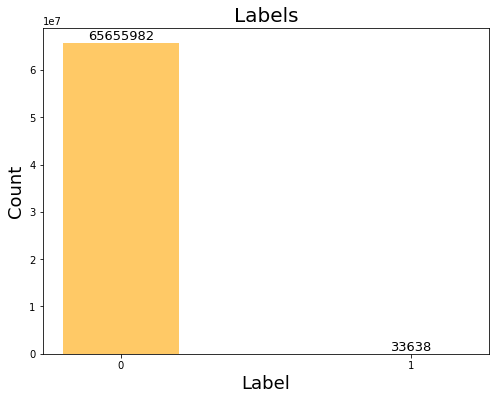

In [7]:
fig = plt.figure(figsize=(8, 6))

# Plot the bar graph
Y_fraud = list(partB["Fraud"].value_counts())
X_fraud = ["0", "1"]

plot = plt.bar(X_fraud, Y_fraud, 
               width = 0.4,
              color = "orange",
              alpha = 0.6)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom', 
             fontsize = 13)
 
# Add labels and title
plt.title("Labels", fontsize = 20)
plt.xlabel("Label", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
 
# Display the graph on the screen
plt.show()

In [8]:
ratio = partB["Fraud"].value_counts(normalize = True) 
print("Fraud: ", round(ratio[0]*100, 2), "%")
print("Non-Fraud: ", round(ratio[1]*100, 2), "%")

Fraud:  99.95 %
Non-Fraud:  0.05 %


### Undersampling

In [9]:
from imblearn import under_sampling

In [10]:
partB["Fraud"] = partB["Fraud"].astype(int)

In [11]:
# Assign X and y features
feature = list(partB.columns)

feature.remove("Fraud")

target = "Fraud"

In [12]:
undersample = under_sampling.RandomUnderSampler(sampling_strategy=0.1)
X, y = undersample.fit_resample(partB[feature], partB[[target]])

In [13]:
X

,NPI,Type,HCPCS_Cd,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,1528516382,Mass Immunizer Roster Biller,90688,O,12,12.0,12,17.840000,17.480000,17.480000,17.480000
1,1952341448,Urology,99203,O,182,182.0,182,165.604396,101.836484,75.827692,80.222308
2,1639129778,Anesthesiology,99212,F,30,32.0,32,38.000000,24.742500,16.588125,16.869062
3,1124089362,Dermatology,11642,O,22,23.0,23,557.000000,161.076087,128.336957,118.695652
4,1558345256,Diagnostic Radiology,76770,F,24,24.0,24,121.666667,34.897917,26.622917,27.842917
...,...,...,...,...,...,...,...,...,...,...,...
370013,1891090262,Family Practice,99214,O,448,1840.0,1840,134.870174,100.255984,66.537440,73.621049
370014,1891090262,Family Practice,99215,O,69,83.0,83,180.000000,133.703373,91.565060,101.650361
370015,1891090262,Family Practice,G0180,O,17,20.0,20,64.000000,48.900000,38.960000,42.380000
370016,1891090262,Family Practice,G0438,O,46,46.0,46,150.000000,147.000000,147.000000,170.940000


In [14]:
under_partB = pd.concat([X, y], axis = 1)
under_partB.head()

,NPI,Type,HCPCS_Cd,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,Fraud
0,1528516382,Mass Immunizer Roster Biller,90688,O,12,12.0,12,17.840000,17.480000,17.480000,17.480000,0
1,1952341448,Urology,99203,O,182,182.0,182,165.604396,101.836484,75.827692,80.222308,0
2,1639129778,Anesthesiology,99212,F,30,32.0,32,38.000000,24.742500,16.588125,16.869062,0
3,1124089362,Dermatology,11642,O,22,23.0,23,557.000000,161.076087,128.336957,118.695652,0
4,1558345256,Diagnostic Radiology,76770,F,24,24.0,24,121.666667,34.897917,26.622917,27.842917,0


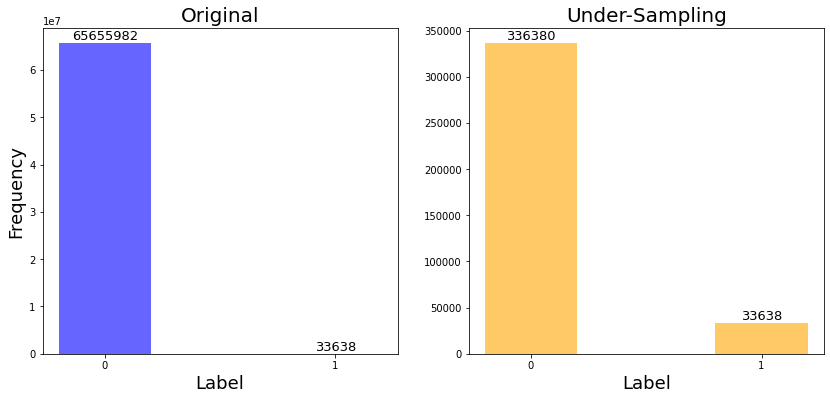

In [15]:
plt.figure(figsize=(14, 6))
plt.subplot(121)

# Plot the bar graph for the original train
Y_fraud = list(partB[target].value_counts())
Labels = ["0", "1"]

plot = plt.bar(Labels, Y_fraud, 
               width = 0.4,
              color = "blue",
              alpha = 0.6)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom', 
             fontsize = 13)

# Add labels and title
plt.title("Original", fontsize = 20)
plt.xlabel("Label", fontsize = 18)
plt.ylabel("Frequency", fontsize = 18)


plt.subplot(122)

# Plot the bar graph for the over-sampled train
Y_fraud_under = list(under_partB[target].value_counts())

plot_under = plt.bar(Labels, Y_fraud_under, 
               width = 0.4,
              color = "orange",
              alpha = 0.6)
 
# Add the data value on head of the bar
for value in plot_under:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom', 
             fontsize = 13)

# Add labels and title
plt.title("Under-Sampling", fontsize = 20)
plt.xlabel("Label", fontsize = 18)

# Display the graph on the screen
plt.show()

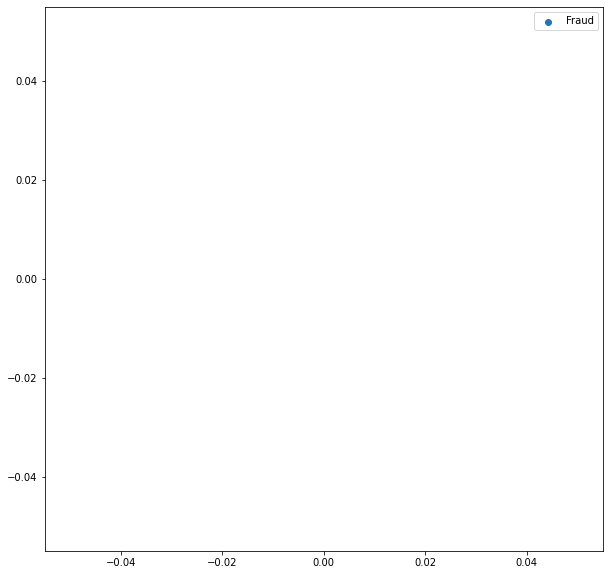

In [16]:
# scatter plot of the data transformed by SMOTE 
# x-axis = "Tot_Benes_mean"
# y-axis = "Tot_Bene_Day_Srvcs_mean"

plt.figure(figsize=(10, 10))

counter = Counter(y)
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X.iloc[row_ix, 3], X.iloc[row_ix, 5], label=str(label))
plt.legend()
plt.show()

# Logistic Regression

### Both Log transformation and square root transformation create lots of NaN values

In [17]:
under_partB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370018 entries, 0 to 370017
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   NPI                 370018 non-null  int64  
 1   Type                370018 non-null  object 
 2   HCPCS_Cd            370018 non-null  object 
 3   Place_Of_Srvc       370018 non-null  object 
 4   Tot_Benes           370018 non-null  int64  
 5   Tot_Srvcs           370018 non-null  float64
 6   Tot_Bene_Day_Srvcs  370018 non-null  int64  
 7   Avg_Sbmtd_Chrg      370018 non-null  float64
 8   Avg_Mdcr_Alowd_Amt  370018 non-null  float64
 9   Avg_Mdcr_Pymt_Amt   370018 non-null  float64
 10  Avg_Mdcr_Stdzd_Amt  370018 non-null  float64
 11  Fraud               370018 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 33.9+ MB


In [18]:
under_partB = under_partB.drop(columns=['HCPCS_Cd'])

In [19]:
# Assign X and y features

X_var = list(under_partB.columns)

for var in ["NPI", "Fraud", "Type", "Place_Of_Srvc"]:
    X_var.remove(var)

y_var = "Fraud"

In [20]:
under_partB["Fraud"] = under_partB["Fraud"].astype(int)

In [21]:
# Split the whole dataset into train and test dataset
# Using a stratified random sampling so that the Fraud-class (1) data are evenly split into train & test sets
x_train, x_test, y_train, y_test = train_test_split(under_partB[X_var], under_partB[y_var], test_size=0.2, stratify=under_partB["Fraud"])

# Also concatenate the split x & y dataframes 
tr_df = pd.concat([x_train, y_train], axis = 1)
te_df = pd.concat([x_test, y_test], axis = 1)

In [22]:
import statsmodels.api as sm
logit = sm.Logit(y_train.astype(float), x_train.astype(float))
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.455839
         Iterations 10


In [23]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Fraud   No. Observations:               296014
Model:                          Logit   Df Residuals:                   296007
Method:                           MLE   Df Model:                            6
Date:                Sun, 07 Nov 2021   Pseudo R-squ.:                 -0.4964
Time:                        20:28:23   Log-Likelihood:            -1.3493e+05
converged:                       True   LL-Null:                       -90176.
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Tot_Benes             -0.0031   5.94e-05    -52.992      0.000      -0.003      -0.003
Tot_Srvcs           1.989e-05   3.97e-06      5.010      0.000    1.21e-05    2.77e-05
Tot_Bene_Day_Srvcs     0.0003   1.13e-05     25.094      0.000       0.000       0.000
Avg_Sbmtd_Chrg        -0.0023   5.03e-05    -46.072      0.000      -0.002      -0.002
Avg_Mdcr_Alowd_Amt    -0.0061      0.001     -9.627      0.000      -0.007      -0.005
Avg_Mdcr_Pymt_Amt      0.0166      0.001     13.433      0.000       0.014       0.019
Avg_Mdcr_Stdzd_Amt    -0.0230      0.001    -22.555      0.000      -0.025      -0.021
======================================================================================
"""

### One-Hot Encoding

In [24]:
under_partB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370018 entries, 0 to 370017
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   NPI                 370018 non-null  int64  
 1   Type                370018 non-null  object 
 2   Place_Of_Srvc       370018 non-null  object 
 3   Tot_Benes           370018 non-null  int64  
 4   Tot_Srvcs           370018 non-null  float64
 5   Tot_Bene_Day_Srvcs  370018 non-null  int64  
 6   Avg_Sbmtd_Chrg      370018 non-null  float64
 7   Avg_Mdcr_Alowd_Amt  370018 non-null  float64
 8   Avg_Mdcr_Pymt_Amt   370018 non-null  float64
 9   Avg_Mdcr_Stdzd_Amt  370018 non-null  float64
 10  Fraud               370018 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 31.1+ MB


In [25]:
# One-Hot Encoding 

# Convert the Fraud variable to object datatype
under_partB["Fraud"] = under_partB["Fraud"].astype(object)

# Encoding
encoded_partB = pd.get_dummies(under_partB, drop_first = True)

# Rename some of the changed variable names
encoded_partB.rename(columns = {"Fraud_1":"Fraud"}, inplace = True)

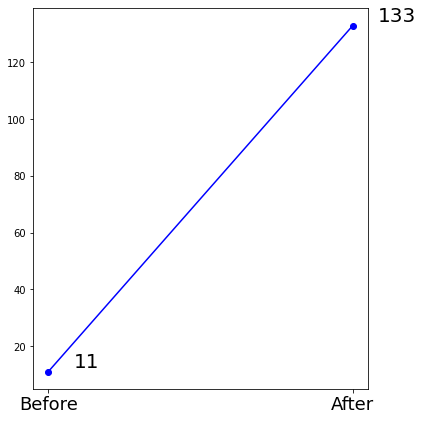

In [26]:
# Feature size of the encoded dataset 

fig, ax = plt.subplots(figsize=(6,7))

xs = ["Before", "After"]
ys = [len(under_partB.columns), len(encoded_partB.columns)]
ax.plot(xs, ys, "bo-")

for x,y in zip(xs, ys):
    label = "{:d}".format(y)
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(25,4), 
                 ha='left',
                fontsize = 20) 
    
ax.set_xticklabels(xs, fontsize=18)

plt.show()

In [27]:
list(encoded_partB.columns)

['NPI',
 'Tot_Benes',
 'Tot_Srvcs',
 'Tot_Bene_Day_Srvcs',
 'Avg_Sbmtd_Chrg',
 'Avg_Mdcr_Alowd_Amt',
 'Avg_Mdcr_Pymt_Amt',
 'Avg_Mdcr_Stdzd_Amt',
 'Type_Advanced Heart Failure and Transplant Cardiology',
 'Type_All Other Suppliers',
 'Type_Allergy/ Immunology',
 'Type_Allergy/Immunology',
 'Type_Ambulance Service Provider',
 'Type_Ambulance Service Supplier',
 'Type_Ambulatory Surgical Center',
 'Type_Anesthesiologist Assistants',
 'Type_Anesthesiology',
 'Type_Anesthesiology Assistant',
 'Type_Audiologist',
 'Type_Audiologist (billing independently)',
 'Type_CRNA',
 'Type_Cardiac Electrophysiology',
 'Type_Cardiac Surgery',
 'Type_Cardiology',
 'Type_Cardiovascular Disease (Cardiology)',
 'Type_Centralized Flu',
 'Type_Certified Clinical Nurse Specialist',
 'Type_Certified Nurse Midwife',
 'Type_Certified Registered Nurse Anesthetist (CRNA)',
 'Type_Chiropractic',
 'Type_Clinic or Group Practice',
 'Type_Clinical Cardiac Electrophysiology',
 'Type_Clinical Cardiatric Electrophysiology

In [28]:
encoded_partB.head(5)

,NPI,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,Type_Advanced Heart Failure and Transplant Cardiology,Type_All Other Suppliers,...,Type_Thoracic Surgery,Type_Undefined Physician type,Type_Undersea and Hyperbaric Medicine,Type_Unknown Physician Specialty Code,Type_Unknown Supplier/Provider,Type_Unknown Supplier/Provider Specialty,Type_Urology,Type_Vascular Surgery,Place_Of_Srvc_O,Fraud
0,1528516382,12,12.0,12,17.840000,17.480000,17.480000,17.480000,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1952341448,182,182.0,182,165.604396,101.836484,75.827692,80.222308,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1639129778,30,32.0,32,38.000000,24.742500,16.588125,16.869062,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1124089362,22,23.0,23,557.000000,161.076087,128.336957,118.695652,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1558345256,24,24.0,24,121.666667,34.897917,26.622917,27.842917,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Spliting

In [29]:
# Assign X and y features

X_var = list(encoded_partB.columns)

for var in ["NPI", "Fraud"]:
    X_var.remove(var)

y_var = "Fraud"

In [30]:
partB["Fraud"] = partB["Fraud"].astype(object)

In [31]:
# Split the whole dataset into train and test dataset
# Using a stratified random sampling so that the Fraud-class (1) data are evenly split into train & test sets
x_train, x_test, y_train, y_test = train_test_split(encoded_partB[X_var], encoded_partB[y_var], test_size=0.2, stratify=encoded_partB["Fraud"])

# Also concatenate the split x & y dataframes 
tr_df = pd.concat([x_train, y_train], axis = 1)
te_df = pd.concat([x_test, y_test], axis = 1)

In [32]:
# Calculate the odds ratio of Fraud & Non-fraud labels for train & test sets

train_0 = len(tr_df[tr_df["Fraud"] == 0])
train_1 = len(tr_df[tr_df["Fraud"] == 1])

test_0 = len(te_df[te_df["Fraud"] == 0])
test_1 = len(te_df[te_df["Fraud"] == 1])

split_df = pd.DataFrame({"x_axis":["Train", "Test"], 
                         "Ratio":[train_1/train_0*100, test_1/test_0*100]})

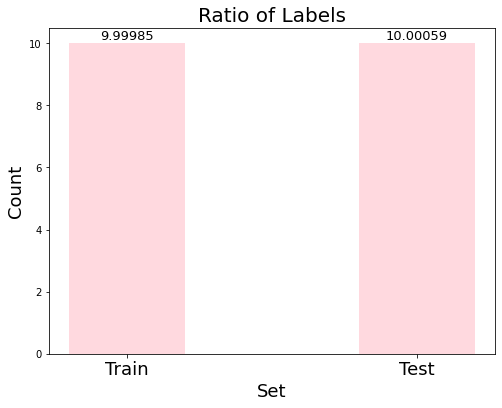

In [33]:
fig, ax = plt.subplots(figsize=(8,6))

# Plot the bar graph
plot = plt.bar(split_df["x_axis"], split_df["Ratio"], 
               width = 0.4,
              color = "pink",
              alpha = 0.6)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%.5f' % height, ha='center', va='bottom', 
             fontsize = 13)
 
# Add labels and title
plt.title("Ratio of Labels", fontsize = 20)
plt.xlabel("Set", fontsize = 18)
plt.ylabel("Count", fontsize = 18)

ax.set_xticklabels(split_df["x_axis"], fontsize=18)

# Display the graph on the screen
plt.show()

### Histogram

In [34]:
cont_features = encoded_partB.columns[1:7].tolist()


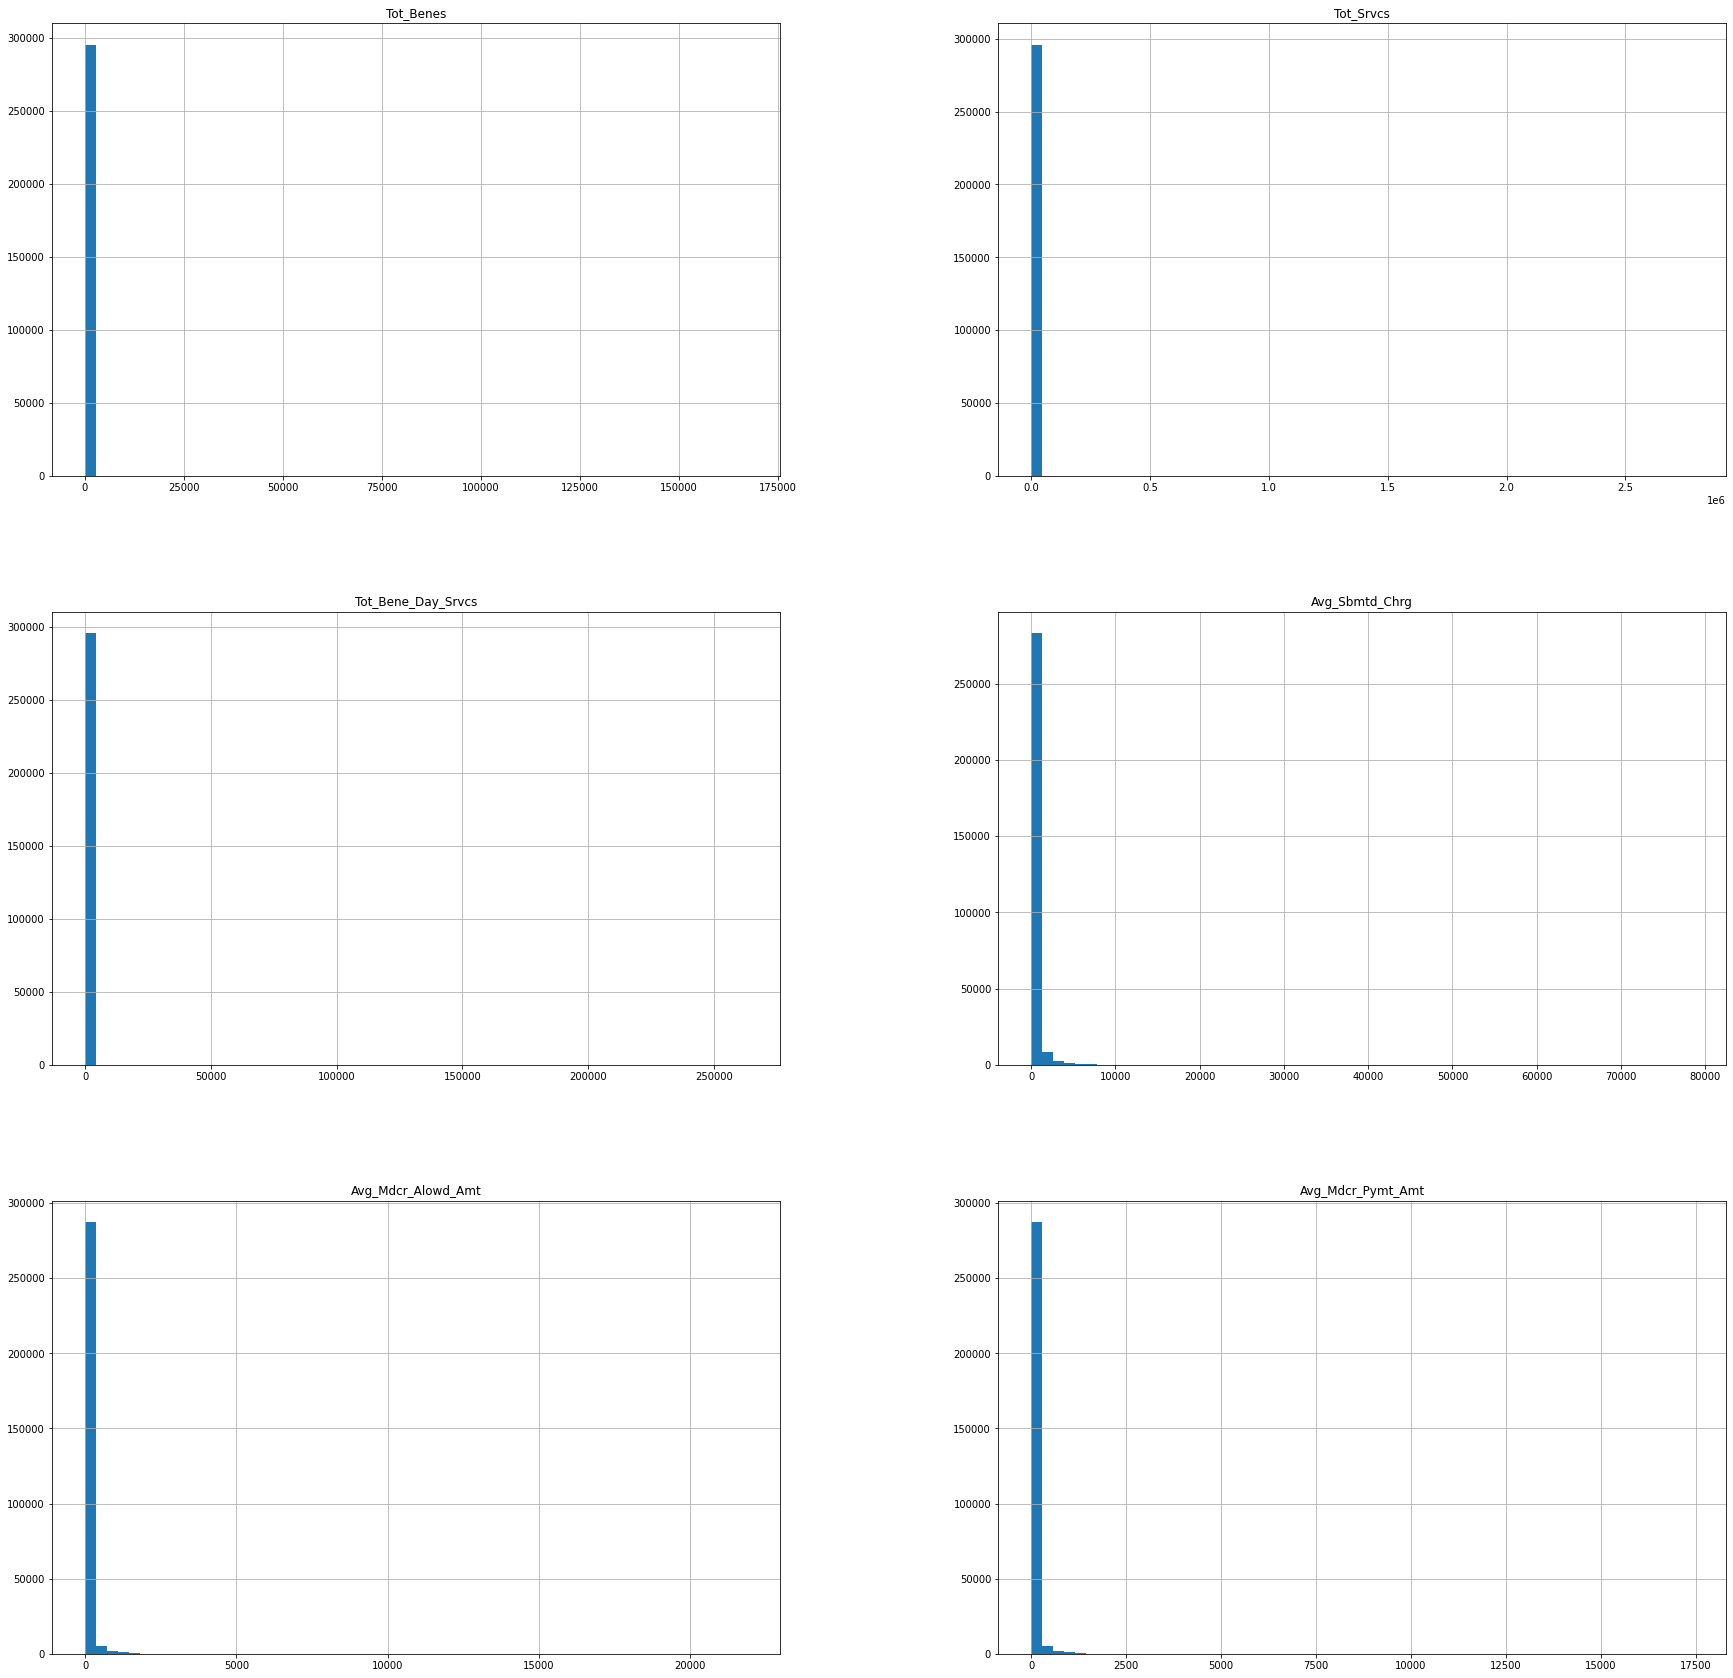

In [35]:
# Histograms


_ = tr_df[cont_features].hist(bins=60, figsize=(30, 30))

### Heat map for correlations

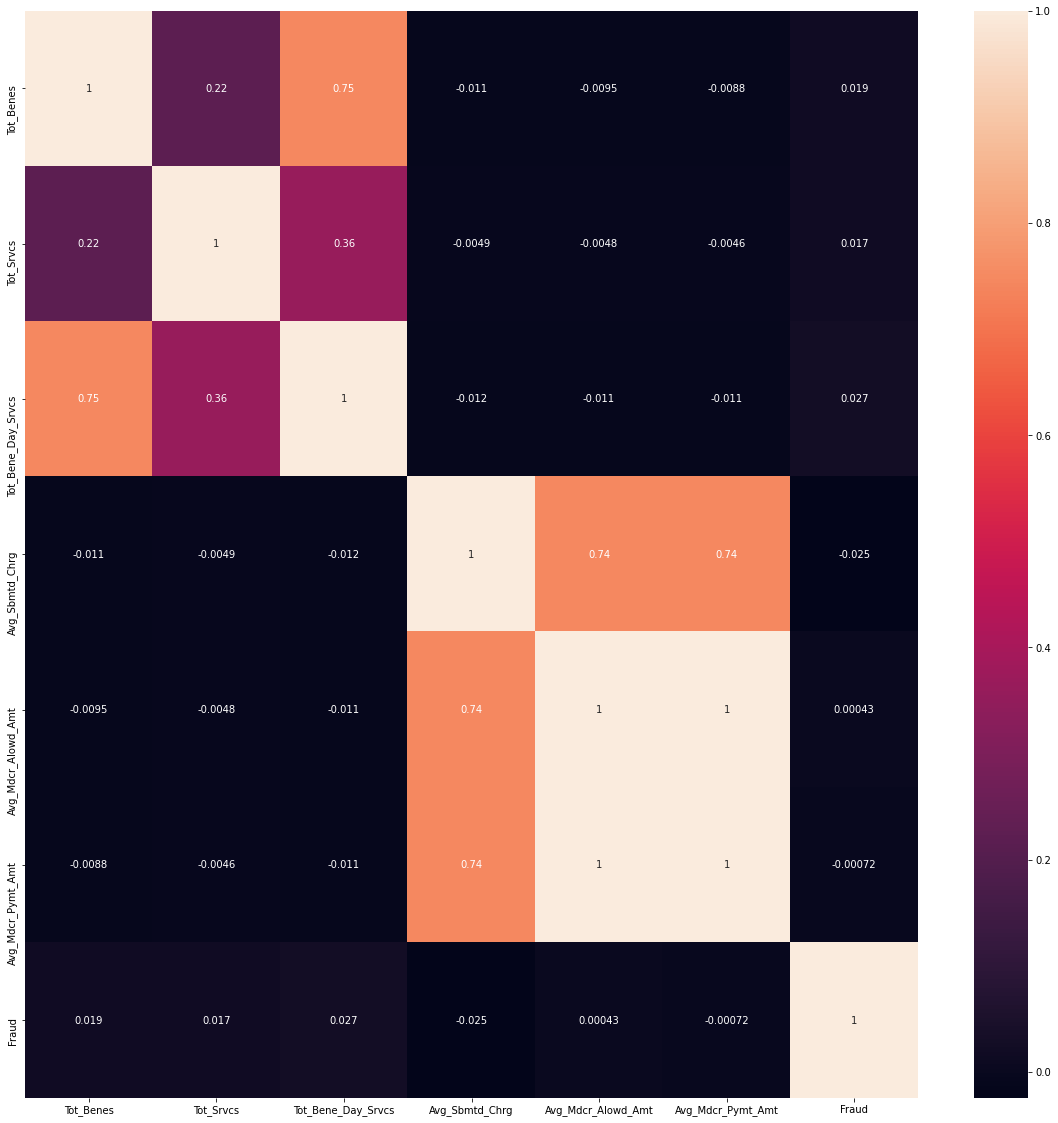

In [36]:
# Check Multicollinearity 
plt.figure(figsize = (20,20))

corr = encoded_partB[cont_features + [y_var]].corr()
_ = sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values, annot = True)

### box plot

In [37]:
# in order to draw the box plots of all the features in the same y-axis, scale the variables
scaled_tr = pd.DataFrame(scale(tr_df[cont_features]), columns = cont_features)

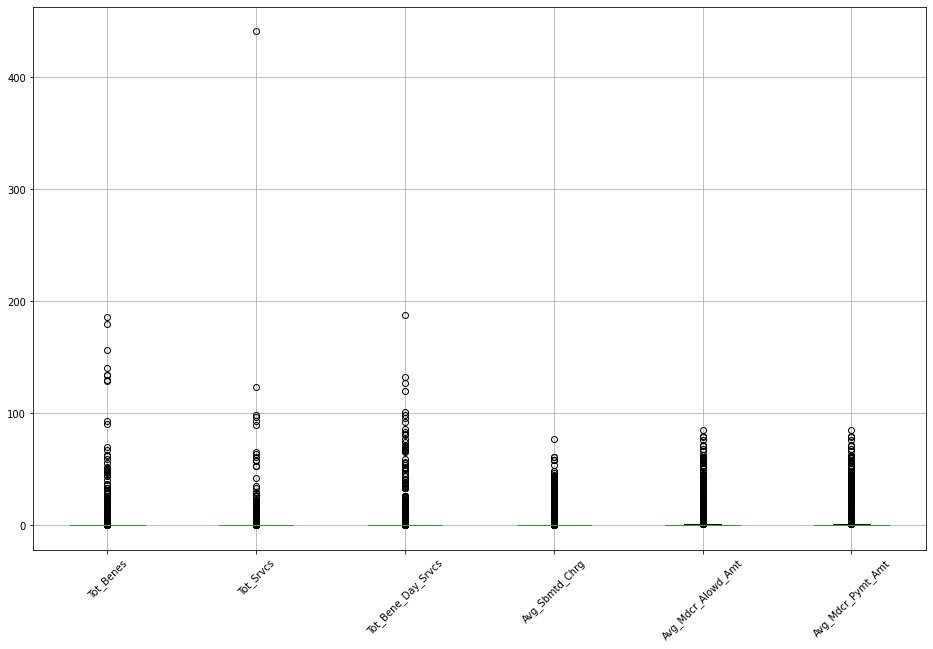

In [38]:
# box plots for the continous variables 
plt.figure(figsize=(16, 10))

scaled_tr.boxplot()
plt.xticks(rotation=45)
plt.show()

# Building Logistic Model 2

In [39]:
log_x_train = np.log10(x_train)

In [40]:
log_x_train

,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,Type_Advanced Heart Failure and Transplant Cardiology,Type_All Other Suppliers,Type_Allergy/ Immunology,...,Type_Surgical Oncology,Type_Thoracic Surgery,Type_Undefined Physician type,Type_Undersea and Hyperbaric Medicine,Type_Unknown Physician Specialty Code,Type_Unknown Supplier/Provider,Type_Unknown Supplier/Provider Specialty,Type_Urology,Type_Vascular Surgery,Place_Of_Srvc_O
12342,2.718502,2.768638,2.747412,0.978718,0.511371,0.511371,0.512820,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0
198351,1.531479,1.778151,1.778151,2.784617,2.201435,2.090318,2.063469,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0
289861,1.204120,1.255273,1.255273,1.893947,1.174447,1.029023,1.049455,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
258471,1.361728,2.193125,2.193125,1.698970,1.412064,1.277981,1.324297,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0
287203,1.176091,1.176091,1.176091,2.722576,2.263474,2.164791,2.090686,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125205,1.447158,1.806180,1.591065,1.740363,1.419899,1.307215,1.349284,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0
82136,1.397940,1.397940,1.397940,2.748188,2.284707,2.188310,2.211741,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
284276,1.832509,1.832509,1.832509,2.297020,2.133125,2.006660,2.036171,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.0
240077,1.079181,1.176091,1.146128,2.115278,0.924383,0.794767,1.009649,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf


### Split train set to traininig and validation

In [41]:
# Split the train dataset into train and valuation dataset
# Using a stratified random sampling so that the Fraud-class (1) data are evenly split into train & validation sets

import random
random.seed(123)

x_tr, x_val, y_tr, y_val = train_test_split(tr_df[X_var], tr_df[y_var], test_size=0.5, stratify=tr_df["Fraud"])

# Also concatenate the split x & y dataframes 
tr_df2 = pd.concat([x_tr, y_tr], axis = 1)
val_df = pd.concat([x_val, y_val], axis = 1)

### Lasso, Ridge and Elastic Net logistic regression

In [42]:
# import Lasso regression from sklearn library
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

In [43]:
# Train the model
e_net = ElasticNet(alpha = 2)
e_net.fit(x_tr, y_tr)

ElasticNet(alpha=2)

In [44]:
# Calculate Mean Squared Error
y_pred_elastic = e_net.predict(x_val)
mean_squared_error = np.mean((y_pred_elastic - y_val)**2)
print("Mean Squared Error on test set", mean_squared_error)

Mean Squared Error on test set 0.08239018417624236


When alpha is 1, test error is 0.08255548134699825 <br />
When alpha is 2, test error is 0.08248444554002286 <br />
When alpha is 3, test error is 0.08257611046241442

In [45]:
### Finding elstic Net coefficient for each variable

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_tr.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff.sort_values(by=['Coefficient Estimate'])

,Columns,Coefficient Estimate
0,Tot_Benes,-1.369206e-05
3,Avg_Sbmtd_Chrg,-7.854227e-06
95,Type_Pharmacy,-0.000000e+00
94,Type_Peripheral Vascular Disease,-0.000000e+00
93,Type_Pediatric Medicine,0.000000e+00
...,...,...
42,Type_Family Practice,0.000000e+00
130,Place_Of_Srvc_O,0.000000e+00
1,Tot_Srvcs,4.057712e-08
4,Avg_Mdcr_Alowd_Amt,1.219032e-05


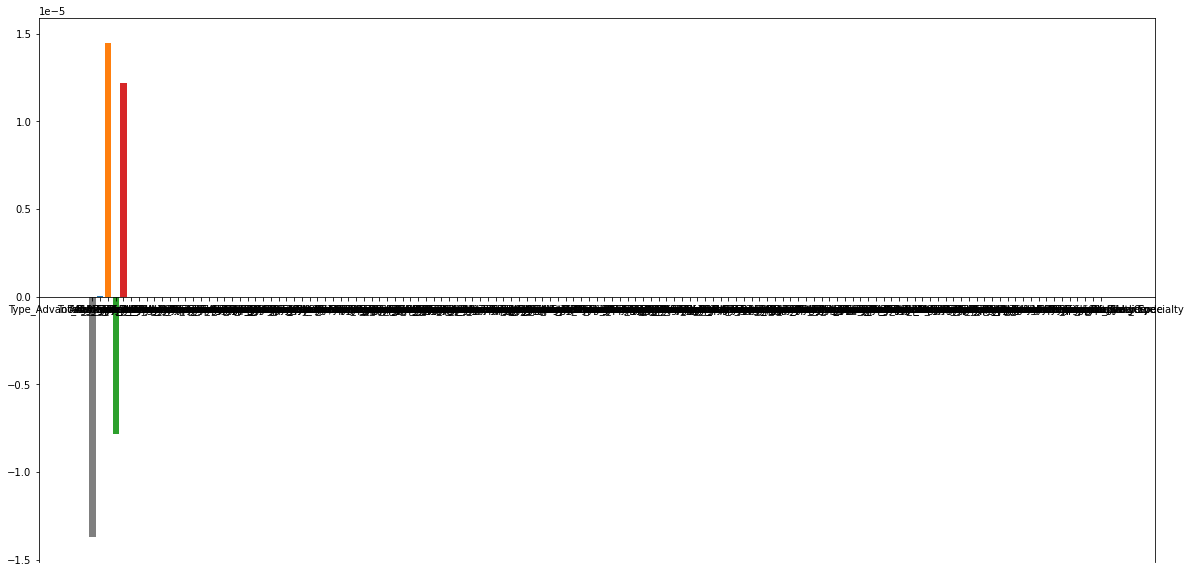

In [46]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
 
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
 
ax.bar(e_net_coeff["Columns"],
e_net_coeff['Coefficient Estimate'],
color = color)
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.show()

### Some of these variables are important using test dataset

In [47]:
var_e =e_net_coeff[ e_net_coeff['Coefficient Estimate'] != 0].sort_values(by=['Coefficient Estimate'])

In [48]:
var_e

,Columns,Coefficient Estimate
0,Tot_Benes,-1.369206e-05
3,Avg_Sbmtd_Chrg,-7.854227e-06
1,Tot_Srvcs,4.057712e-08
4,Avg_Mdcr_Alowd_Amt,1.219032e-05
2,Tot_Bene_Day_Srvcs,1.448070e-05


In [49]:
### Define x and y variables

X_var_e = var_e["Columns"]
y_var_e = "Fraud"

In [50]:
X_var_e

0             Tot_Benes
3        Avg_Sbmtd_Chrg
1             Tot_Srvcs
4    Avg_Mdcr_Alowd_Amt
2    Tot_Bene_Day_Srvcs
Name: Columns, dtype: object

In [51]:
# Drop p-value > 0.05

#X_var_e = X_var_e.drop(index = [5,13,1,11,15,17])

In [52]:
#X_var_e

In [53]:
x_test_ela = x_test [X_var_e]
y_test_ela = y_test

In [54]:
logit_ela = sm.Logit(y_test_ela, x_test_ela).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


In [55]:
logit_ela.summary2()

/Users/buynow/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/buynow/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit              Pseudo R-squared:   inf   
Dependent Variable:   Fraud              AIC:                inf   
Date:                 2021-11-07 20:28   BIC:                inf   
No. Observations:     74004              Log-Likelihood:     -inf  
Df Model:             4                  LL-Null:            0.0000
Df Residuals:         73999              LLR p-value:        1.0000
Converged:            1.0000             Scale:              1.0000
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Tot_Benes          -0.0044   0.0001 -32.9682 0.0000 -0.0047 -0.0042
Avg_Sbmtd_Chrg     -0.0018   0.0001 -19.5506 0.0000 -0.0020 -0.0016
Tot_Srvcs           0.0000   0.0000   4.3889 0.0000  0.0000  0.0001
Avg_Mdcr_Alowd_Amt -0.0120   0.0003 -42.6361 0.0000 -0.0125 -0.0114
Tot_Bene_Day_Srvcs  0.0004   0.0000  23.6887 0.0000  0.0003  0.0004
===================================================================

"""

### Detecting Multi-collineaity Using Variance Inflation Factors (VIF)

In [56]:
def get_vif_factors (X):
    X_matrix =X.to_numpy()
    vif= [variance_inflation_factor(X_matrix,i) for i in range (X_matrix.shape[1])]
    vif_factors =pd.DataFrame()
    vif_factors['column'] =X.columns
    vif_factors['vif'] =vif
    return vif_factors

In [57]:
X_features = tr_df.columns
X_features

Index(['Tot_Benes', 'Tot_Srvcs', 'Tot_Bene_Day_Srvcs', 'Avg_Sbmtd_Chrg',
       'Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Pymt_Amt', 'Avg_Mdcr_Stdzd_Amt',
       'Type_Advanced Heart Failure and Transplant Cardiology',
       'Type_All Other Suppliers', 'Type_Allergy/ Immunology',
       ...
       'Type_Thoracic Surgery', 'Type_Undefined Physician type',
       'Type_Undersea and Hyperbaric Medicine',
       'Type_Unknown Physician Specialty Code',
       'Type_Unknown Supplier/Provider',
       'Type_Unknown Supplier/Provider Specialty', 'Type_Urology',
       'Type_Vascular Surgery', 'Place_Of_Srvc_O', 'Fraud'],
      dtype='object', length=132)

In [58]:
vif_factors = get_vif_factors( tr_df[X_features])
vif_factors

,column,vif
0,Tot_Benes,5.519255
1,Tot_Srvcs,1.348209
2,Tot_Bene_Day_Srvcs,6.337544
3,Avg_Sbmtd_Chrg,2.729569
4,Avg_Mdcr_Alowd_Amt,850.867684
...,...,...
127,Type_Unknown Supplier/Provider Specialty,1.000026
128,Type_Urology,1.072051
129,Type_Vascular Surgery,1.018656
130,Place_Of_Srvc_O,3.902831


### Stepwise feature selection

# KNN 2

In [59]:
### F-1 score and AUC & logistic regression (feature selection)

In [60]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

In [61]:
#Train Model and Predict

knn_tic = time.time()

k = 4 
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
Pred_y_knn = neigh.predict(x_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y_knn))

knn_toc = time.time() - knn_tic
print('KNN training completed in %.2f s.' % (knn_toc))

KeyboardInterrupt: 

### KNN metrics

In [62]:


# roc_auc_score(y_val, Pred_y_knn)

fpr, tpr, thresholds =roc_curve(y_test, Pred_y_knn)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

NameError: name 'Pred_y_knn' is not defined

In [ ]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

In [ ]:
f1_score(y_test, Pred_y_knn)

In [ ]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

# Decision Tree

In [75]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", random_state=1234)

In [76]:
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred_dec = clf.predict(x_test)

In [77]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dec))

Accuracy: 0.8787903356575321


[Text(167.4, 190.26, 'X[130] <= 0.5\nentropy = 0.439\nsamples = 296014\nvalue = [269104, 26910]'),
 Text(83.7, 135.9, 'X[39] <= 0.5\nentropy = 0.251\nsamples = 113483\nvalue = [108737, 4746]'),
 Text(41.85, 81.53999999999999, 'X[62] <= 0.5\nentropy = 0.302\nsamples = 85797\nvalue = [81195, 4602]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.288\nsamples = 85166\nvalue = [80884, 4282]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 1.0\nsamples = 631\nvalue = [311, 320]'),
 Text(125.55000000000001, 81.53999999999999, 'X[3] <= 169.963\nentropy = 0.047\nsamples = 27686\nvalue = [27542, 144]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.025\nsamples = 17446\nvalue = [17402, 44]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.079\nsamples = 10240\nvalue = [10140, 100]'),
 Text(251.10000000000002, 135.9, 'X[39] <= 0.5\nentropy = 0.533\nsamples = 182531\nvalue = [160367, 22164]'),
 Text(209.25, 81.53999999999999, 'X[62] <= 0.5\nentropy = 0.547\nsamples = 174760\nvalue 

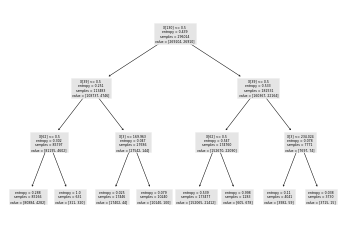

In [70]:
from sklearn import tree
tree.plot_tree(clf)

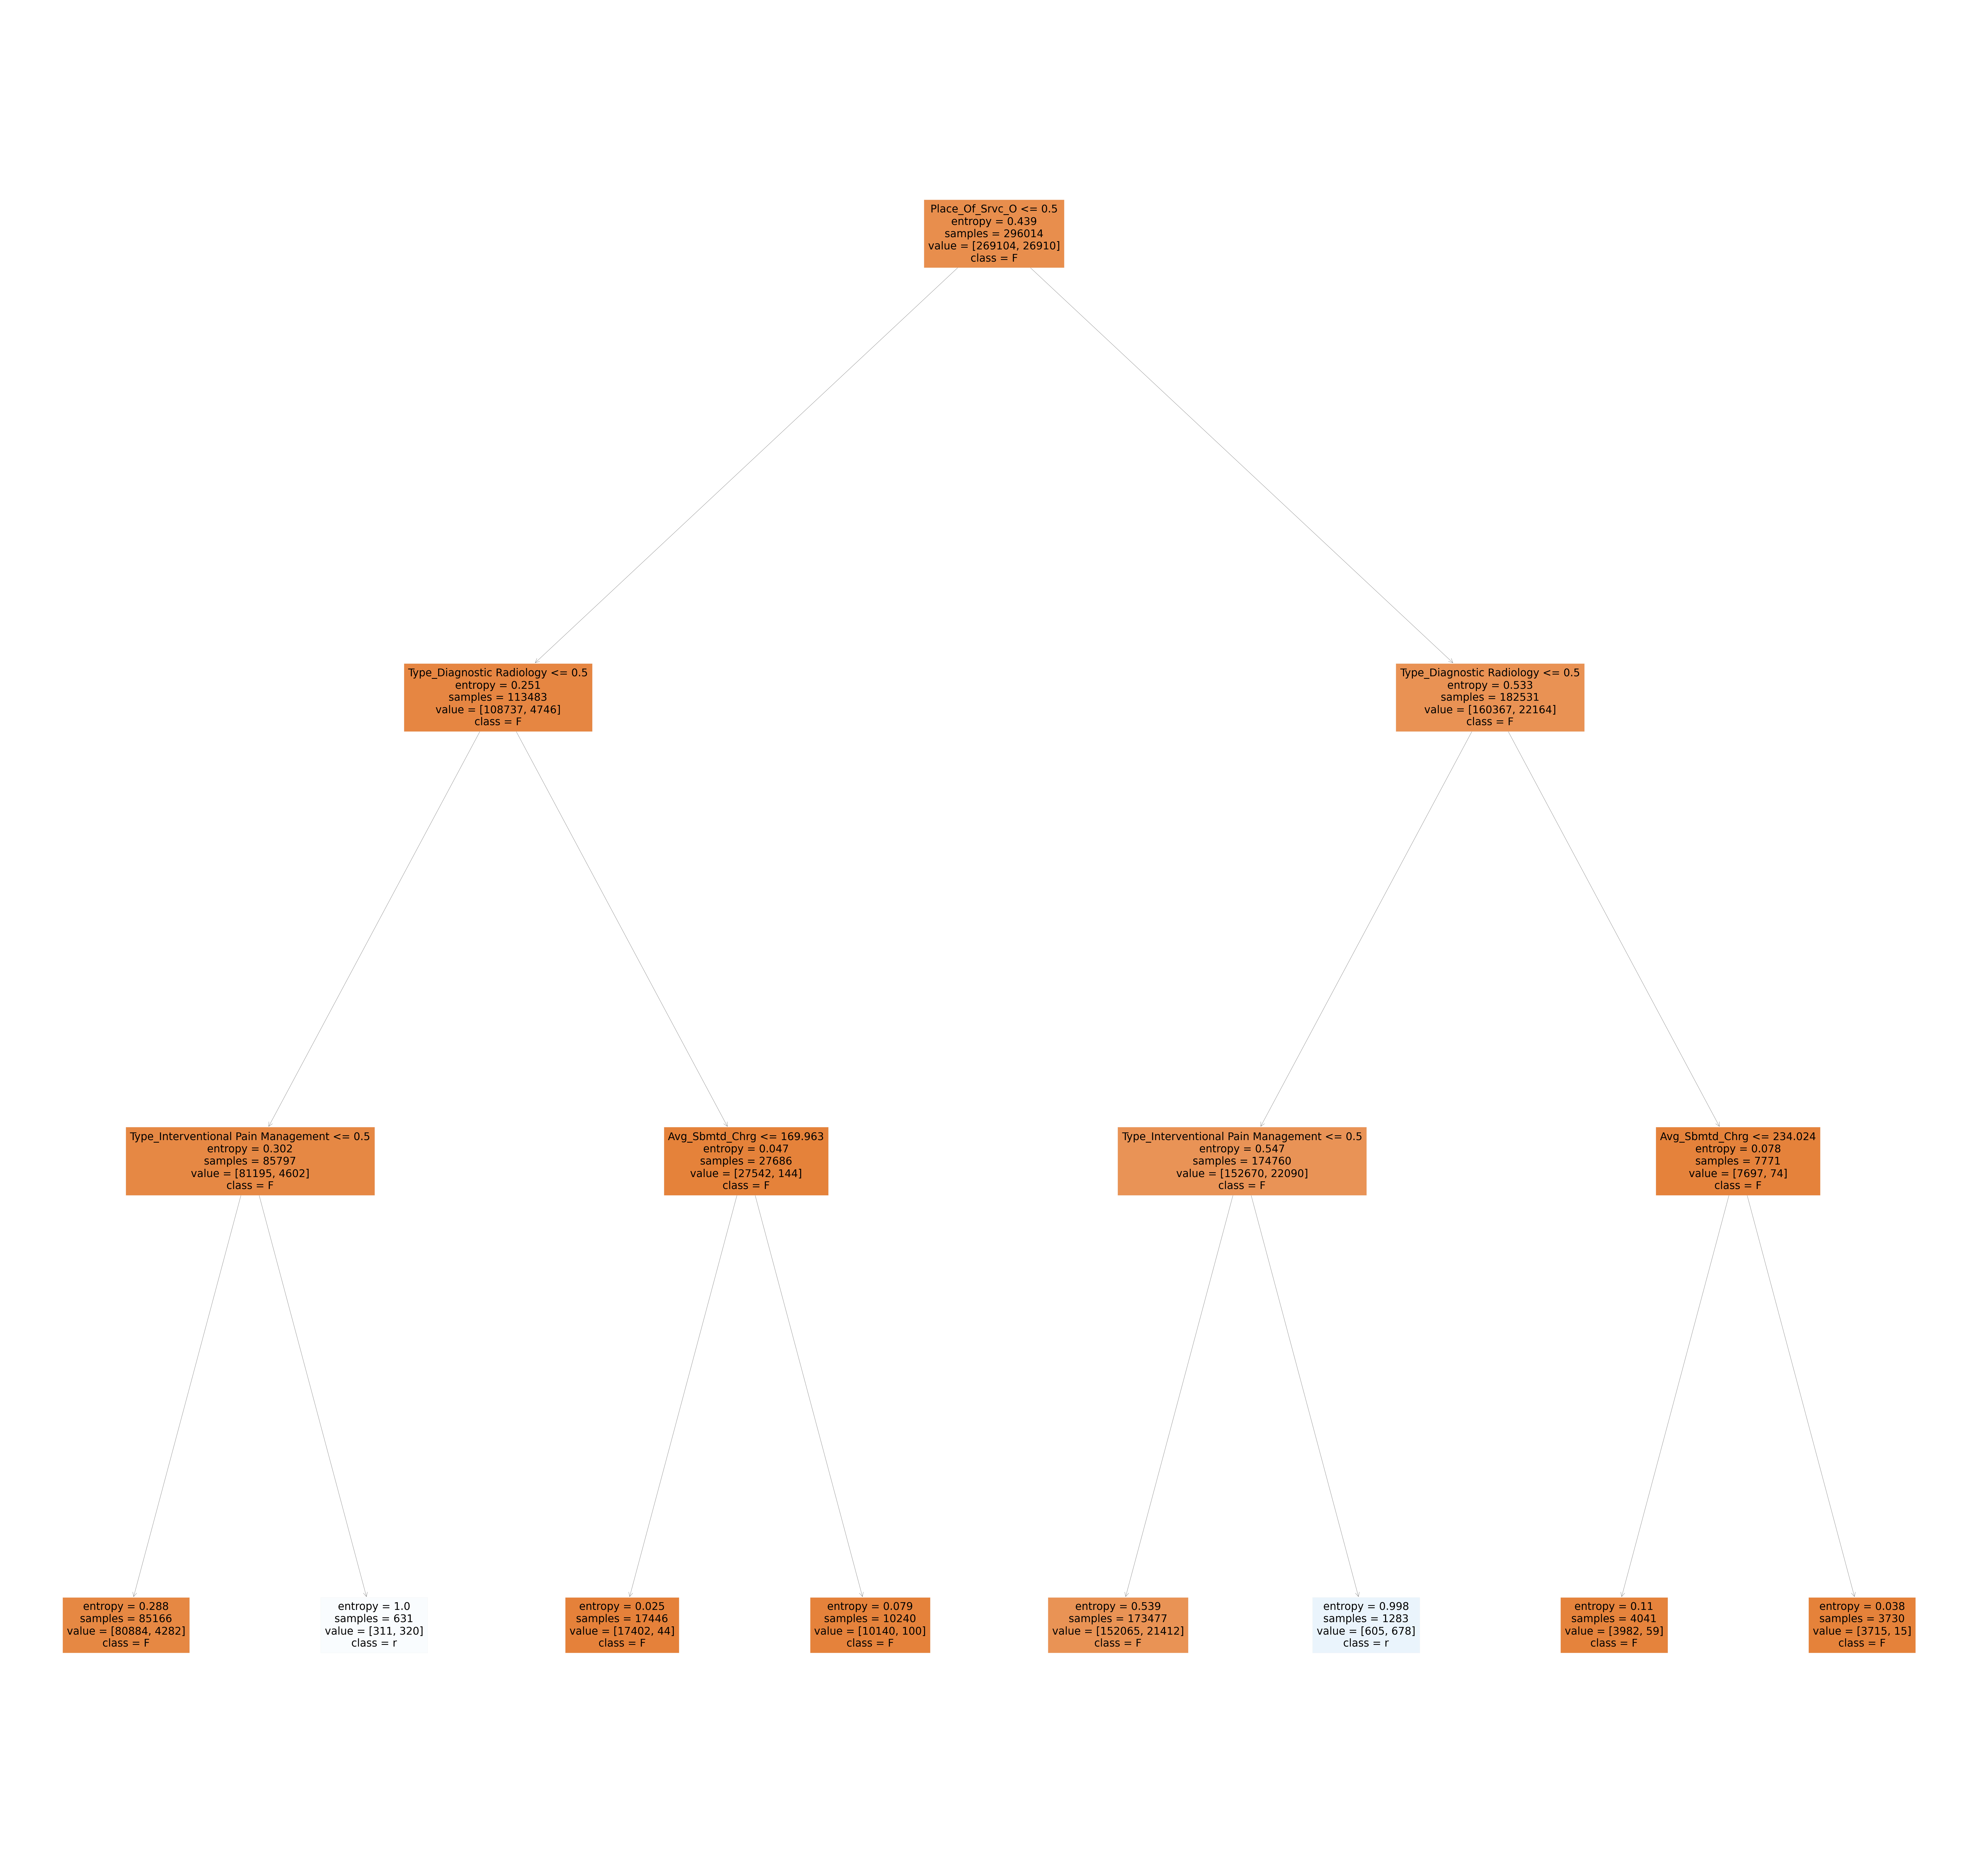

In [71]:
fig = plt.figure(figsize=(125,120))
_ = tree.plot_tree(clf, 
                   feature_names=X_var,  
                   class_names=y_var,
                   filled=True)

In [72]:
fig.savefig("decistion_tree.png")

### Decision Tree Metrics

In [78]:
fpr, tpr, thresholds =roc_curve(y_test, y_pred_dec)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.646669


In [79]:
f1_score(y_test, y_pred_dec)

0.3525335643135557